In [1]:
import pandas as pd
import numpy as np
import fitparse
import math
import plotnine as p9
import os
import fit_functions
from pathlib import Path

In [2]:
df_fitfiles = pd.read_parquet('df_fitfiles.parquet')
df_fitfiles = df_fitfiles.query("sport=='running'").reset_index(drop =True)
df_fitfiles = df_fitfiles.query("datum>='2024-01-01'").reset_index(drop =True)
df_fitfiles = df_fitfiles.sort_values('datum').reset_index(drop=True)
df_fitfiles.head(3)

,short,long,sport,datum
0,13753565011_ACTIVITY.fit,C:\Users\offic\HealthData\FitFiles\Activities\...,running,2024-01-31 17:05:30
1,13829823964_ACTIVITY.fit,C:\Users\offic\HealthData\FitFiles\Activities\...,running,2024-02-05 18:05:32
2,13908810461_ACTIVITY.fit,C:\Users\offic\HealthData\FitFiles\Activities\...,running,2024-02-11 06:10:30


In [ ]:
gesamt_df = pd.DataFrame()
for x,datei in df_fitfiles.iterrows():
    df = fit_functions.parse_fit(datei['long'])
    fit_functions.print_progress_bar(x+1,df_fitfiles.shape[0],datei['short'], datei['datum'], '')
    gesamt_df = pd.concat([gesamt_df,df], ignore_index=True)
gesamt_summary=fit_functions.calc_summary(gesamt_df)
gesamt_summary.to_parquet('gesamt_summary.parquet')

[==================================================] 100%  19054762741_ACTIVITY.fit 2025-05-07 16:53:49 

In [3]:
gesamt_summary=pd.read_parquet('gesamt_summary.parquet')
gesamt_summary = gesamt_summary.query("km>0").query("distance>500").reset_index(drop=True)
gesamt_summary['jahr'] = gesamt_summary['datum'].dt.year.astype('str') 
gesamt_summary['monat'] = gesamt_summary['datum'].dt.month.astype('str').str.zfill(2)
gesamt_summary['jahr-monat'] = gesamt_summary['jahr']+gesamt_summary['monat']
gesamt_summary['anzahl'] = gesamt_summary.groupby(['jahr-monat','km'])['jahr-monat'].transform('count')
gesamt_summary = gesamt_summary.query("km>2").query("km<9")#.query('anzahl>3').reset_index(drop=True)

gesamt_summary

,km,source,datum,hr,step_length,cadence,power,sec,distance,sec_km,kmh,jahr,monat,jahr-monat,anzahl
2,3,C:\Users\offic\HealthData\FitFiles\Activities\...,2024-01-31 17:05:30,165.023346,1146.422311,164.000000,350.739300,256,804.92,318.044029,11.319188,2024,01,202401,1
5,3,C:\Users\offic\HealthData\FitFiles\Activities\...,2024-02-05 18:05:32,167.873494,1075.762048,168.313253,343.984940,331,1001.77,330.415165,10.895384,2024,02,202402,3
6,4,C:\Users\offic\HealthData\FitFiles\Activities\...,2024-02-05 18:05:32,165.466472,1047.941691,166.379009,334.769679,342,998.36,342.561801,10.509053,2024,02,202402,3
9,3,C:\Users\offic\HealthData\FitFiles\Activities\...,2024-02-11 06:10:30,143.205634,1017.346479,165.712676,338.701408,354,999.07,354.329526,10.160034,2024,02,202402,3
10,4,C:\Users\offic\HealthData\FitFiles\Activities\...,2024-02-11 06:10:30,142.714286,970.949735,163.798942,337.092593,377,998.94,377.400044,9.538950,2024,02,202402,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,4,C:\Users\offic\HealthData\FitFiles\Activities\...,2025-05-07 16:53:49,151.248555,1044.153179,166.635838,340.638728,345,1000.11,344.962054,10.435930,2025,05,202505,2
432,5,C:\Users\offic\HealthData\FitFiles\Activities\...,2025-05-07 16:53:49,155.176647,1070.688623,167.520958,351.278443,333,998.36,333.547017,10.793081,2025,05,202505,2
433,6,C:\Users\offic\HealthData\FitFiles\Activities\...,2025-05-07 16:53:49,152.556818,1024.576705,166.000000,326.775568,351,999.04,351.337284,10.246564,2025,05,202505,2
434,7,C:\Users\offic\HealthData\FitFiles\Activities\...,2025-05-07 16:53:49,158.727545,1059.874251,168.712575,348.077844,333,1002.56,332.149697,10.838486,2025,05,202505,2


c:\Users\offic\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 5 rows containing missing values.


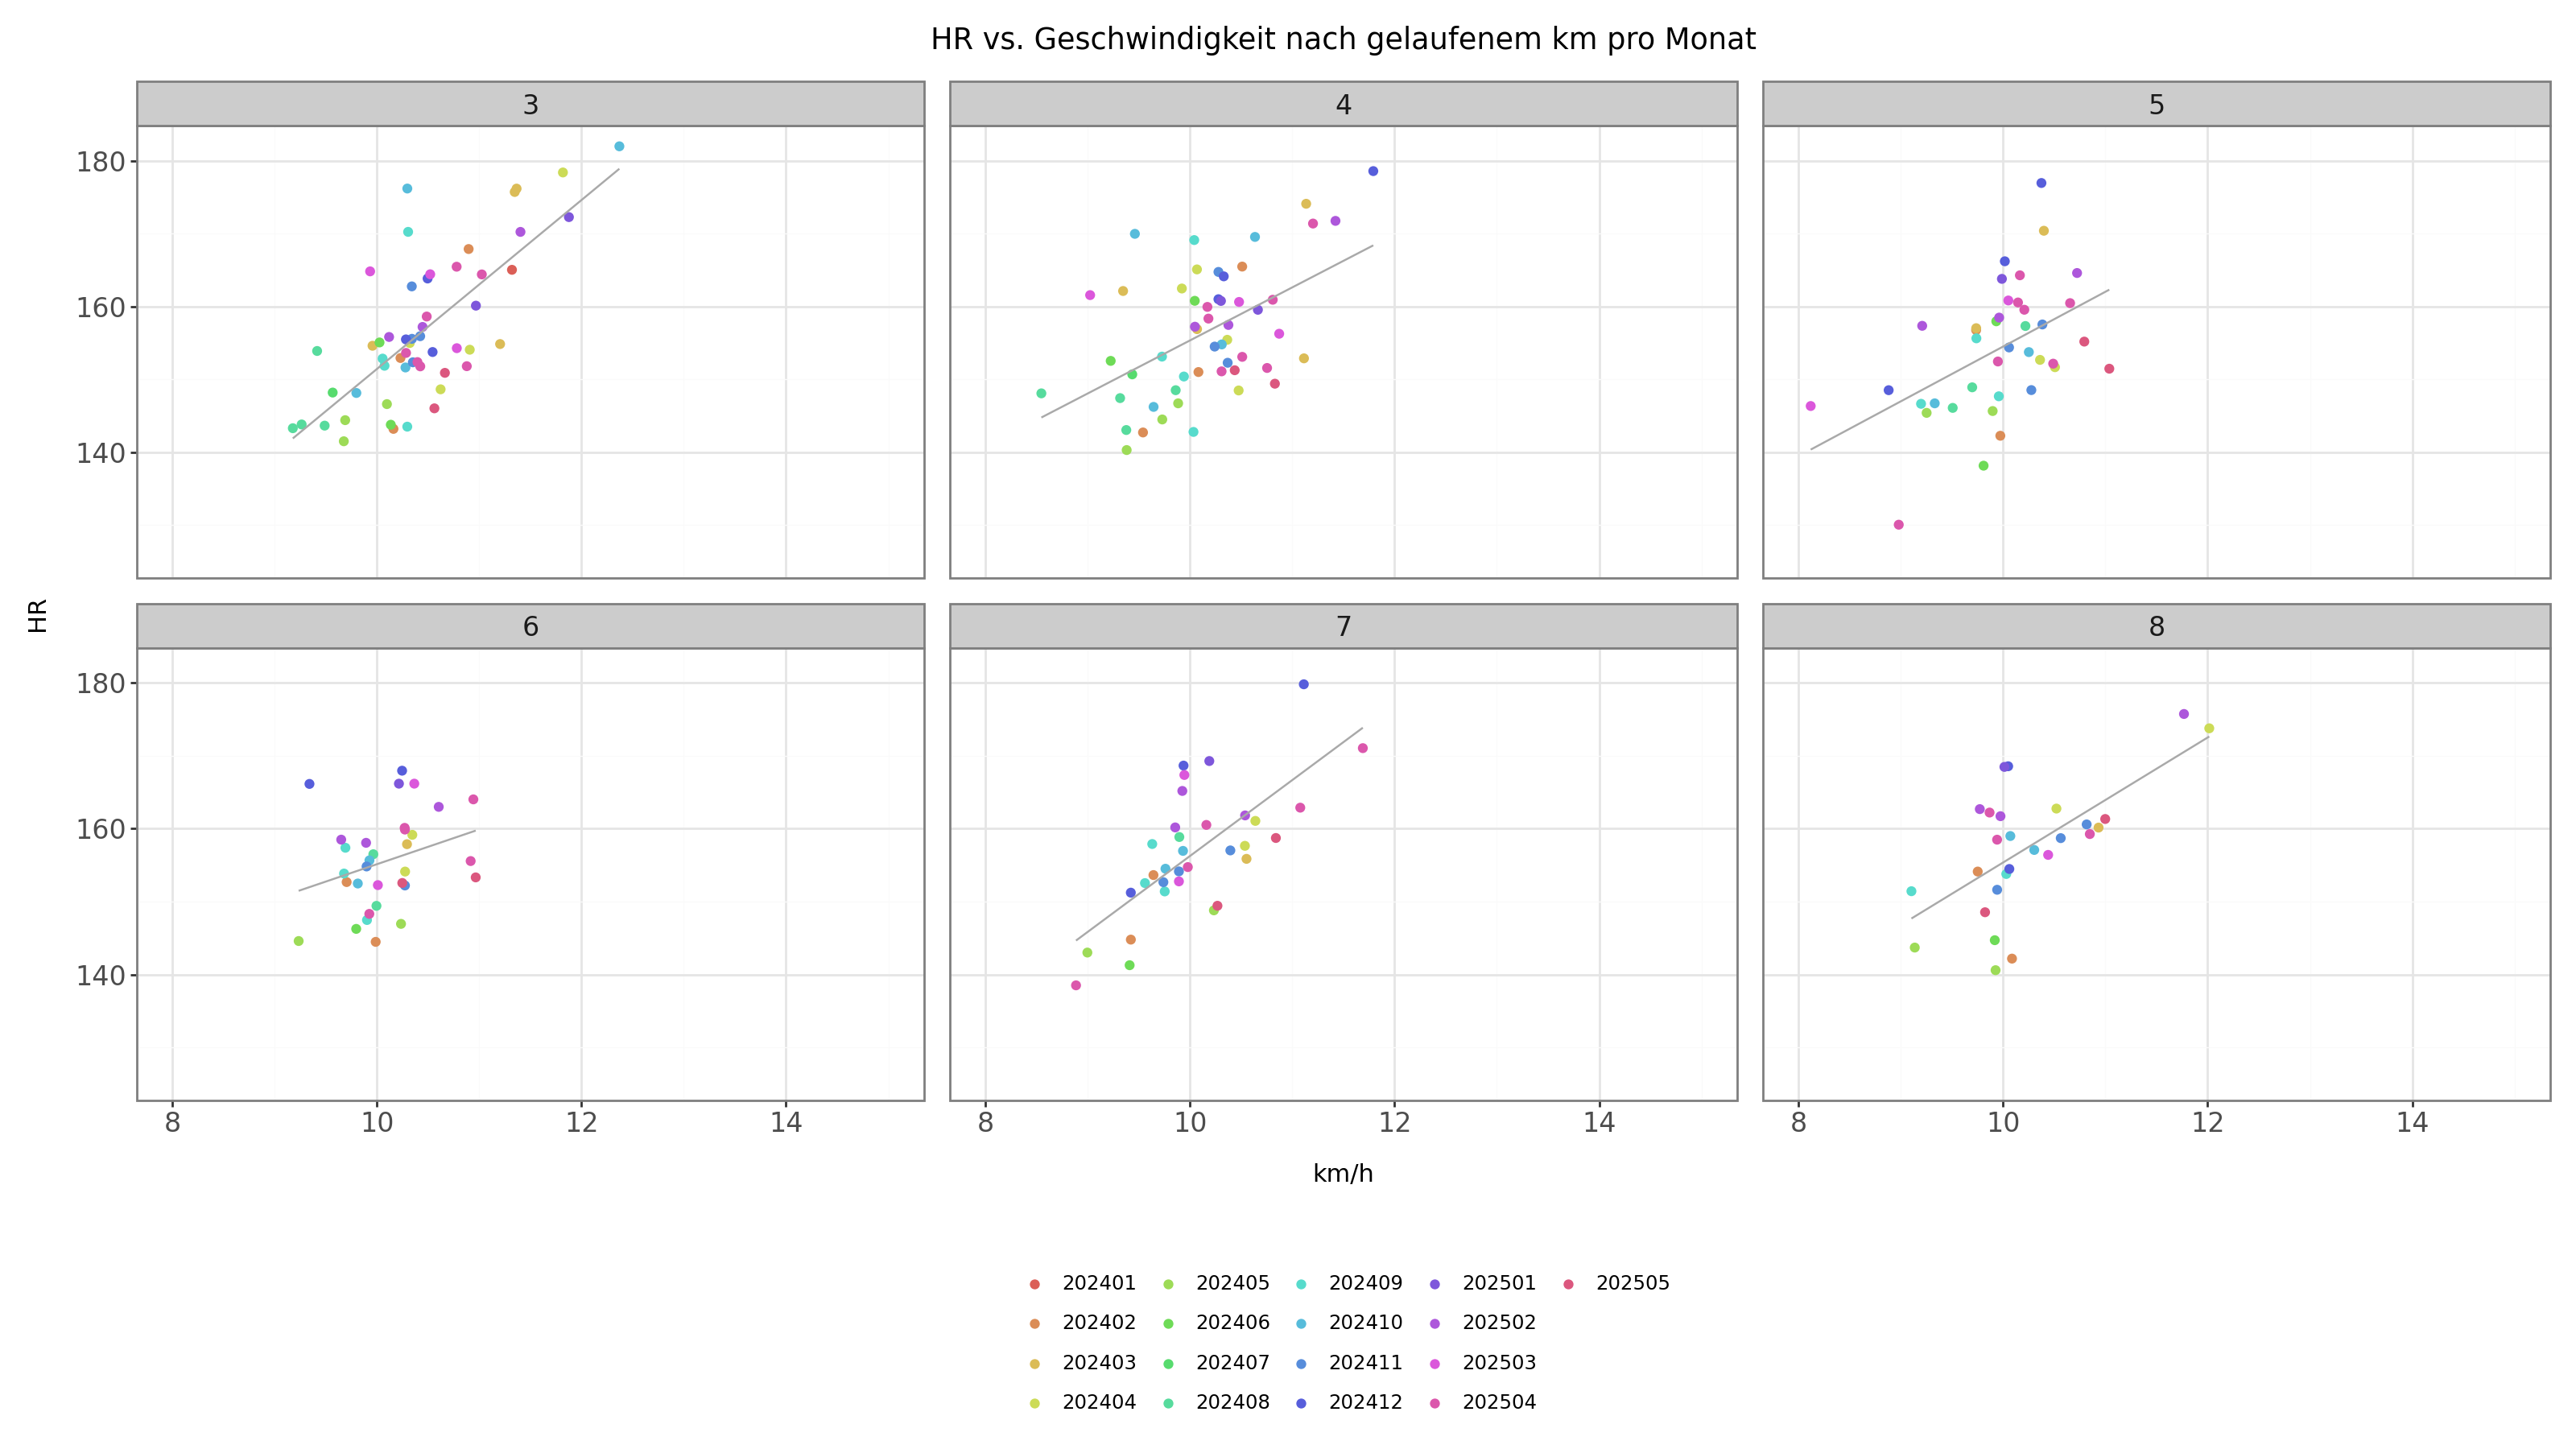

In [4]:
fit_functions.plotSummary_v_hr(gesamt_summary)